In [1]:
import numpy as np
import glob
import xarray as xr
import sys, traceback
import pdb

import matplotlib.pyplot as plt
from matplotlib import rcParams

# CPOL convenience functions
import CPOL_func as cf
import caine_func as caf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func

In [5]:
if __name__ == '__main__':
    try:
        caf.WRF_to_pyart()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Starting conversions.
Saving file 2006-02-09T10:00:00
Saving file 2006-02-09T10:10:00
Saving file 2006-02-09T10:20:00
Starting conversions.
Saving file 2006-02-09T10:30:00
Saving file 2006-02-09T10:40:00
Saving file 2006-02-09T10:50:00


In [5]:
test = xr.open_dataset('/g/data/w40/esh563/lind04_ref/lind04_ref_2006-02-09T10:20:00.nc')

In [7]:
'lind04_ref_' + str(t) + '.nc'

NameError: name 't' is not defined

In [73]:
test = xr.open_dataset('/g/data/rr5/CPOL_radar/CPOL_level_1b/GRIDDED/GRID_150km_2500m/2011/20110312/CPOL_20110312_0750_GRIDS_2500m.nc')

In [97]:
# test.latitude.values[0,0,0,0]
# test.longitude.values[0,0,0,-1]
test.longitude

<xarray.DataArray 'longitude' (time: 1, z: 41, y: 117, x: 117)>
array([[[[129.70265, ..., 132.38513],
         ...,
         [129.71584, ..., 132.37195]],

        ...,

        [[129.70265, ..., 132.38513],
         ...,
         [129.71584, ..., 132.37195]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-03-12T07:50:02
  * x        (x) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * y        (y) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:      Longitude
    units:          degrees_east
    standard_name:  Longitude

In [94]:
-13.549555, -10.941778
129.71584 132.38513

129.71584

In [472]:
wrf = xr.open_dataset('/g/data/w40/esh563/d04.dir/wrfout_d04_2006-02-09_10:00:00.nc.gz')
# hgt_AGL = np.load('/g/data/w40/esh563/d04_hgt_AGL.npy')
# # Create function to de
# def moving_average(a, n=3):
#     ret = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     return ret[n - 1:] / n
wrf = wrf.isel(Time=2)
z = (wrf.PH + wrf.PHB)/9.80665
# wrf['bottom_top']=moving_average(hgt_AGL, n=2)
# wrf['bottom_top_stag'] = hgt_AGL

In [462]:
wrf.XLAT_V.values

array([[-14.302284, -14.302284, -14.302284, ..., -14.302284, -14.302284,
        -14.302284],
       [-14.291168, -14.291168, -14.291168, ..., -14.291168, -14.291168,
        -14.291168],
       [-14.280052, -14.280052, -14.280052, ..., -14.280052, -14.280052,
        -14.280052],
       ...,
       [ -8.864349,  -8.864349,  -8.864349, ...,  -8.864349,  -8.864349,
         -8.864349],
       [ -8.853012,  -8.853012,  -8.853012, ...,  -8.853012,  -8.853012,
         -8.853012],
       [ -8.841675,  -8.841675,  -8.841675, ...,  -8.841675,  -8.841675,
         -8.841675]], dtype=float32)

In [485]:
# wrf.drop(labels=None
wrf_water = wrf[['QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 
                 'T', 'P', 'PB']]
wrf_water['west_east'] = wrf_water.XLONG[0,:]
wrf_water['south_north'] = wrf_water.XLAT[:,0]
# wrf_water = wrf_water.drop(['XLONG', 'XLAT'])

U = wrf['U']
U = U.rolling(west_east_stag=2, center=True).mean().dropna('west_east_stag')
U['west_east_stag'] = wrf_water['west_east'].values
U = U.rename({'west_east_stag' : 'west_east'})
U['south_north'] = U.XLAT_U[:,0].values
U = U.drop(['XLONG_U', 'XLAT_U'])
U.name = 'U'

V = wrf['V']
V = V.rolling(south_north_stag=2, center=True).mean().dropna('south_north_stag')
V['south_north_stag'] = wrf_water['south_north'].values
V = V.rename({'south_north_stag' : 'south_north'})
V['west_east'] = V.XLONG_V[0,:].values
V = V.drop(['XLONG_V', 'XLAT_V'])
V.name = 'V'

wrf_vert = wrf[['W', 'PH', 'PHB']]
wrf_vert['west_east'] = wrf_vert.XLONG[0,:]
wrf_vert['south_north'] = wrf_vert.XLAT[:,0]
wrf_vert = wrf_vert.drop(['XLONG', 'XLAT'])
wrf_vert = wrf_vert.rolling(bottom_top_stag=2, center=True).mean().dropna('bottom_top_stag')
wrf_vert = wrf_vert.rename({'bottom_top_stag' : 'bottom_top'})

wrf_water = xr.merge([wrf_water, U, V, wrf_vert])

In [486]:
wrf_water = wrf_water.coarsen(west_east=2, boundary='trim', side='left').mean()
wrf_water = wrf_water.coarsen(south_north=2, boundary='trim', side='left').mean()

In [ ]:
136, 252
34, 150

In [476]:
np.where((wrf_water.west_east.values >= 129.70584) & (wrf_water.west_east.values <= 132.39513))
np.where((wrf_water.south_north.values >= -13.55555) & (wrf_water.south_north.values <= -10.931778))

(array([ 34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]),)

In [488]:
wrf_water = wrf_water.sel(west_east = slice(129.70584, 132.39513))
wrf_water = wrf_water.sel(south_north = slice(-13.55555, -10.931778))
# wrf_water = wrf_water.isel(west_east = slice(136, 252))
# wrf_water = wrf_water.isel(south_north = slice(34, 150))

In [489]:
wrf_water

<xarray.Dataset>
Dimensions:      (bottom_top: 63, south_north: 117, west_east: 117)
Coordinates:
    XLONG        (south_north, west_east) float32 129.71446 ... 132.37636
    XLAT         (south_north, west_east) float32 -13.533852 ... -10.9326515
  * west_east    (west_east) float32 129.71446 129.73741 ... 132.35341 132.37636
  * south_north  (south_north) float32 -13.533852 -13.511543 ... -10.9326515
Dimensions without coordinates: bottom_top
Data variables:
    QVAPOR       (bottom_top, south_north, west_east) float32 0.021644253 ... 3.932447e-06
    QCLOUD       (bottom_top, south_north, west_east) float32 0.0 0.0 ... 0.0
    QRAIN        (bottom_top, south_north, west_east) float32 9.652342e-27 ... 5.734e-42
    QICE         (bottom_top, south_north, west_east) float32 0.0 0.0 ... 0.0
    QSNOW        (bottom_top, south_north, west_east) float32 7.786836e-39 ... 1.3891007e-18
    QGRAUP       (bottom_top, south_north, west_east) float32 1.3302371e-38 ... 2.3064104e-32
    T      

In [494]:
longitude = wrf_water.XLONG.values
longitude = np.expand_dims(longitude, 0)
longitude = np.concatenate([longitude] * 41)
longitude = np.expand_dims(longitude, 0)

latitude = wrf_water.XLAT.values
latitude = np.expand_dims(latitude, 0)
latitude = np.concatenate([latitude] * 41)
latitude = np.expand_dims(latitude, 0)

In [495]:
latitude.shape

(1, 41, 117, 117)

In [390]:
CPOL = xr.open_dataset('/g/data/rr5/CPOL_radar/CPOL_level_1b/GRIDDED/GRID_150km_2500m/2011/20110312/CPOL_20110312_0750_GRIDS_2500m.nc')

In [401]:
CPOL.longitude

<xarray.DataArray 'longitude' (time: 1, z: 41, y: 117, x: 117)>
[561249 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-03-12T07:50:02
  * x        (x) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * y        (y) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:      Longitude
    units:          degrees_east
    standard_name:  Longitude

In [496]:
from numba import jit
from numba import int32

In [497]:
@jit()
def test_fun(field, z):
    test_int = np.ones((41,117,117)) * np.nan
    z_int = np.arange(0.0,20500.0,500.0)
#     z = (wrf_water.PH+wrf_water.PHB)/9.80665

    for i in range(117):
        for j in range(117):
            test_int[:,i,j] = np.interp(z_int, z[:,i,j], field[:,i,j], left=np.nan)
    return test_int

In [498]:
var_list = ['QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 
            'T', 'P', 'PB', 'U', 'V', 'W']
ds_list = []
x = np.arange(-145000.0, 145000.0 + 2500.0, 2500.0)
y = np.arange(-145000.0, 145000.0 + 2500.0, 2500.0)
for v in var_list:
    test_innt = test_fun(wrf_water[v].values, 
                         ((wrf_water.PH+wrf_water.PHB)/9.80665).values)
    # Expand dims
    # Add time dimension
    ds = xr.Dataset({v: (['z', 'y', 'x'],  test_innt),},
                    coords={'y': y,
                            'x': x,
                            'z': np.arange(0.0,20500.0,500.0)})
    ds_list.append(ds)

In [499]:
# Add latitude longitude values
longitude = wrf_water.XLONG.values
longitude = np.expand_dims(longitude, 0)
longitude = np.concatenate([longitude] * 41)
longitude = np.expand_dims(longitude, 0)
ds = xr.Dataset({'longitude': (['time', 'z', 'y', 'x'],  longitude),},
                coords={'time': t, 'y': y, 'x': x, 'z': z})
ds_list.append(ds)

latitude = wrf_water.XLAT.values
latitude = np.expand_dims(latitude, 0)
latitude = np.concatenate([latitude] * 41)
latitude = np.expand_dims(latitude, 0)
ds = xr.Dataset({'latitude': (['time', 'z', 'y', 'x'],  latitude),},
                coords={'time': t, 'y': y, 'x': x, 'z': z})
ds_list.append(ds)

interpi = xr.merge(ds_list)

NameError: name 't' is not defined

In [400]:
interpi

<xarray.Dataset>
Dimensions:  (x: 117, y: 117, z: 41)
Coordinates:
  * y        (y) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * x        (x) float64 -1.45e+05 -1.425e+05 -1.4e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Data variables:
    QVAPOR   (z, y, x) float64 nan nan nan nan ... 3.936e-06 3.942e-06 3.948e-06
    QCLOUD   (z, y, x) float64 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QRAIN    (z, y, x) float64 nan nan nan nan ... 1.22e-36 2.273e-36 3.45e-36
    QICE     (z, y, x) float64 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QSNOW    (z, y, x) float64 nan nan nan nan ... 2.75e-18 3.63e-18 2.908e-18
    QGRAUP   (z, y, x) float64 nan nan nan nan ... 2.129e-31 8.566e-31 1.008e-30
    T        (z, y, x) float64 nan nan nan nan nan ... 153.5 153.4 153.3 153.3
    P        (z, y, x) float64 nan nan nan nan nan ... 19.88 19.99 20.14 20.39
    PB       (z, y, x) float64 nan nan nan nan ..

In [342]:
test_innt.shape

(41, 117, 117)

In [343]:
ds = xr.Dataset({'QRAIN': (['z', 'latitude', 'longitude'],  test_innt),},
                  coords={'longitude': wrf_water['west_east'].values,
                  'latitude':wrf_water['south_north'].values,
                  'z': np.arange(0,20500,500)})

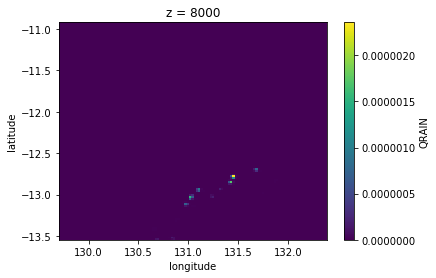

In [348]:
ds['QRAIN'].sel(z=8000).plot()

In [403]:
rho_air = 1.225
N0r = 8*10**6
N0g = 4*10**6
N0s = 2*10**7
rho_rain = 1000
rho_snow = 100
rho_graup = 400

In [404]:
T = (interpi.T + 300)*(100000/(interpi.PB+interpi.P)) ** (-0.286) - 273.15

In [405]:
rain_ref = 720 * (rho_air * interpi.QRAIN) ** (7/4) / (N0r ** (3/4) * (np.pi * rho_rain) ** (7/4))
snow_ref = 720 * (rho_air * interpi.QSNOW) ** (7/4) / (N0s ** (3/4) * (np.pi * rho_snow) ** (7/4)) * (rho_snow / rho_rain) ** 2 * (T < 0) *  0.224 
graup_ref = 720 * (rho_air * interpi.QGRAUP) ** (7/4) / (N0g ** (3/4) * (np.pi * rho_graup) ** (7/4)) * (rho_graup / rho_rain) ** 2 * (T < 0) * 0.224 

In [406]:
Z = 10 * np.log10(10 ** 18 * (rain_ref+snow_ref+graup_ref))

In [407]:
Z.values[Z<0] = np.nan
Z.name = 'reflectivity'

In [408]:
xr.merge([interpi,Z])

<xarray.Dataset>
Dimensions:       (x: 117, y: 117, z: 41)
Coordinates:
  * y             (y) float64 -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * x             (x) float64 -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * z             (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Data variables:
    QVAPOR        (z, y, x) float64 nan nan nan ... 3.942e-06 3.948e-06
    QCLOUD        (z, y, x) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QRAIN         (z, y, x) float64 nan nan nan ... 1.22e-36 2.273e-36 3.45e-36
    QICE          (z, y, x) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    QSNOW         (z, y, x) float64 nan nan nan ... 2.75e-18 3.63e-18 2.908e-18
    QGRAUP        (z, y, x) float64 nan nan nan ... 8.566e-31 1.008e-30
    T             (z, y, x) float64 nan nan nan nan ... 153.5 153.4 153.3 153.3
    P             (z, y, x) float64 nan nan nan nan ... 19.88 19.99 20.14 20.39
    PB            (z, y, x) float64 nan nan nan ... 5.613e+

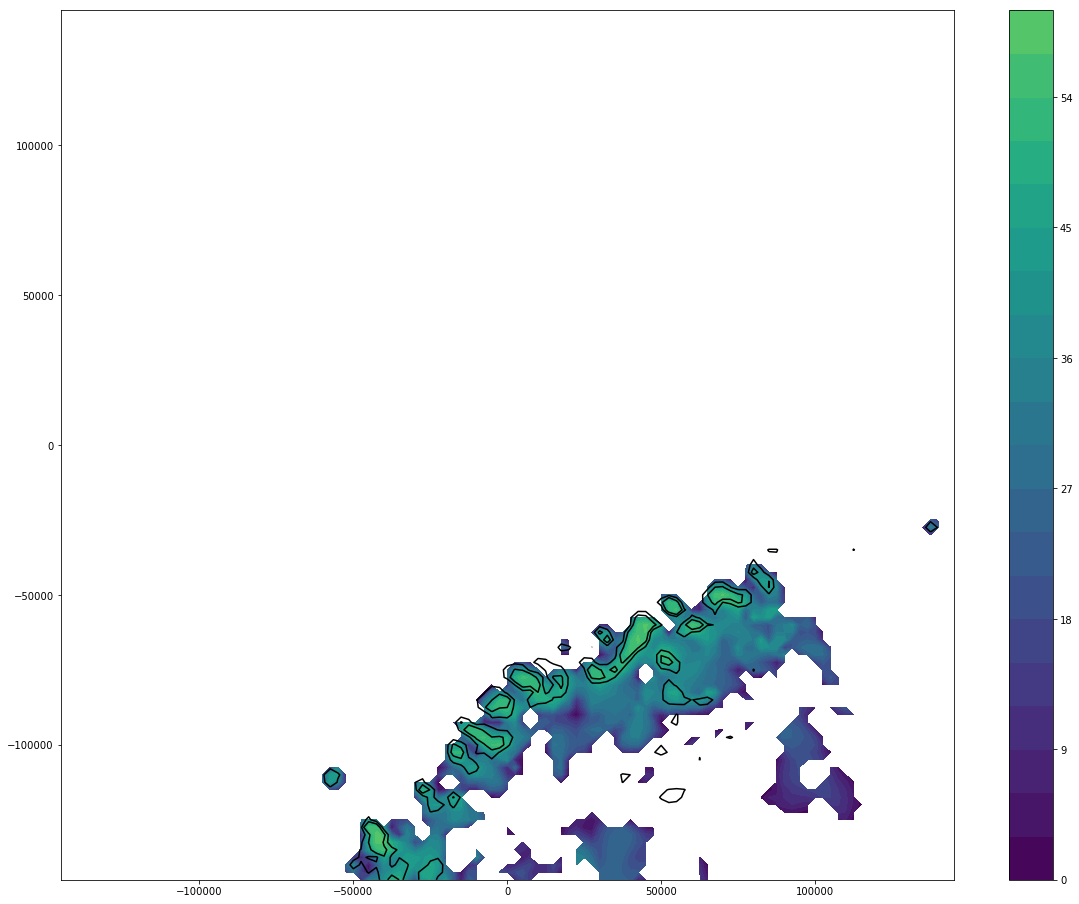

In [425]:
plt.figure(figsize=(20, 16))
W = interpi['W']
hgt_lev=5000
plt.contourf(Z.x, Z.y, Z.sel(z=hgt_lev, method='nearest'), 20, vmin=0, vmax=80)
# plt.pcolormesh(Z.longitude, Z.latitude, Z.sel(z=hgt_lev, method='nearest'))
plt.colorbar()
plt.contour(W.x, W.y, W.sel(z=hgt_lev, method='nearest'), colors='k', levels=[1,5])
# plt.contour(interpi.x, interpi.y, interpi['QRAIN'].sel(z=hgt_lev, method='nearest'), colors='k', n=2)

In [366]:
W

<xarray.DataArray 'W' (bottom_top: 63, south_north: 117, west_east: 117)>
array([[[ 2.60939589e-03,  6.52425829e-03,  4.19883244e-03, ...,
         -6.53097685e-03,  3.43662570e-03,  2.74853483e-02],
        [-1.01577630e-03,  3.06889787e-03,  5.62066026e-03, ...,
         -1.40173659e-02, -1.09690893e-02,  8.36873055e-03],
        [-3.57101811e-03, -5.45208808e-03, -3.11506586e-03, ...,
         -1.63174532e-02, -1.52487298e-02, -4.71443404e-03],
        ...,
        [-6.64367992e-03, -9.68456827e-03, -1.02461800e-02, ...,
          2.43183598e-03,  2.61007017e-03,  2.43900297e-03],
        [ 1.66351534e-02,  2.11766548e-02,  2.03468390e-02, ...,
          2.96704425e-03,  3.84129328e-03,  5.17139724e-03],
        [ 1.36522111e-04,  2.30405713e-03,  4.51409817e-03, ...,
          2.58822134e-03,  4.38052556e-03,  6.22777687e-03]],

       [[ 7.09449966e-03,  1.87225118e-02,  1.26158912e-02, ...,
         -2.05852874e-02,  2.23021908e-03,  3.54014412e-02],
        [-3.20735690e-03,  8.